# Summary

let's draw some sheep

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader

import torchvision
from torchvision import transforms, utils

from draw_strokes import draw_strokes, make_grid_svg

In [2]:
train = np.load("Sheep_Market/train.npy", encoding='latin1')
test = np.load("Sheep_Market/test.npy", encoding='latin1')
valid = np.load("Sheep_Market/valid.npy", encoding='latin1')

print("train: '{}', test: '{}', valid: '{}'".format(train.shape, test.shape, valid.shape))

train: '(7400,)', test: '(300,)', valid: '(300,)'


# Helper code

General utilities used to do the assignment.

In [17]:
class SheepDataset(Dataset):
    """ 
    Reference: 
        https://www.kaggle.com/leighplt/pytorch-starter-kit 
    """
    
    def __init__(self, npyfpath, mode='train', transform=None, size=256):
        self.dataset = np.load(npyfpath, encoding='latin1')
        self.mode = mode
        self.transform = transform
        self.size = size
 
    @staticmethod
    def _draw(raw_strokes, size=256, lw=6, time_color=True):
        BASE_SIZE = 256
        img = np.zeros((BASE_SIZE, BASE_SIZE), np.uint8)
        for t, stroke in enumerate(raw_strokes):
            for i in range(len(stroke[0]) - 1):
                color = 255 - min(t, 10) * 13 if time_color else 255
                _ = cv2.line(img, (stroke[0][i], stroke[1][i]),
                             (stroke[0][i + 1], stroke[1][i + 1]), color, lw)
        if size != BASE_SIZE:
            return cv2.resize(img, (size, size))
        else:
            return img
        
    def __len__(self):
        return self.dataset.shape[0]
    
    def __getitem__(self, idx):
        raw_strokes = self.dataset[idx]
        sample = self._draw(raw_strokes, size=self.size, lw=2, time_color=True)
        if self.transform:
            sample = self.transform(sample)
        if self.mode == 'train':
            return sample
        else:
            return sample
    

# 2.1 Rendering

Let's meet the sheep.

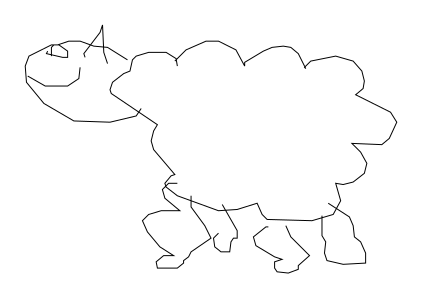

In [18]:
draw_strokes(train[0])

In [19]:
train_loader = DataLoader(SheepDataset("Sheep_Market/train.npy"))


In [20]:
# functions to show an image
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [21]:
# get some images
dataiter = iter(train_loader)
images = dataiter.next()

TypeError: object of type 'numpy.int16' has no len()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


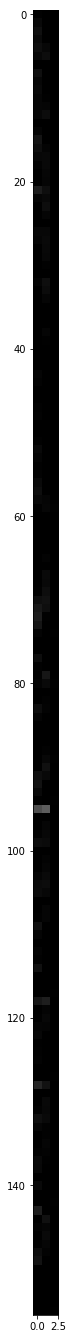

In [22]:
# show images
plt.figure(figsize=(16,24))
imshow(torchvision.utils.make_grid(images))